# Programa para plotar a precipitação acumulada obtida pelo MERGE (produto de precipitação por satelite do CPTEC/INPE)
### Obs: Precipitacao acumulada pelo MERGE foi usada apenas no segundo evento na versao corrigida da tese devido a baixa quantidade de estacoes com dados disponiveis para o dia 

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import xarray as xr

### Leitura dos dados de precipitação acumulada

In [10]:
ds = xr.open_dataset('Precip_total.nc')
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (lon: 493, lat: 701)
Coordinates:
  * lon      (lon) float64 4kB 277.9 278.0 278.1 278.2 ... 326.9 327.0 327.1
  * lat      (lat) float64 6kB -56.95 -56.85 -56.75 -56.65 ... 12.85 12.95 13.05
Data variables:
    precip   (lat, lon) float64 3MB ...

In [11]:
lat = ds['lat']
lon = ds['lon']  # - 180
title_plot = ('Precipitação acumulada MERGE')  
title_figure = ('PrecipTotal_MERGE')
rain = (ds['precip'])

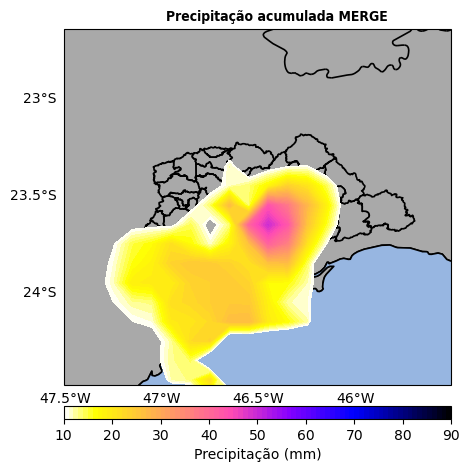

In [12]:
proj = cartopy.crs.PlateCarree(central_longitude=-46.5)
trans = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', subplot_kw=dict(projection=proj))
extent=[-47.5056, -45.5064, -24.4774, -22.6414]
ax.set_extent(extent, crs=trans)
grid_spc_lat=0.5
grid_spc=0.5
shapename_SP = '...'
resol = '10m'  # use data at this scale
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
ax.add_feature(land, linewidth=1.2 , facecolor='darkgrey', edgecolor='black')
ax.add_feature(ocean, linewidth=1.2, edgecolor='black')
stt_prv = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines',
    scale='10m',facecolor='white')
ax.add_feature(stt_prv, linewidth=1.2, facecolor='darkgrey', edgecolor='k', alpha=1)
ax.add_geometries(shpreader.Reader(shapename_SP).geometries(), trans,
        linewidth=1.2, facecolor='darkgrey', edgecolor='black')
gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                    ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
clevs_rain = np.arange(10,91,1)
cmap = plt.get_cmap('gnuplot2')
reversed_color_map = cmap.reversed()
ticks=[10,20,30,40,50,60,70,80,90]
rain_cont = ax.contourf(
        lon, lat, rain, clevs_rain, extend='neither', transform=trans, alpha=1.0,zorder=2, cmap=reversed_color_map) 
fig.colorbar(rain_cont, spacing='uniform', ticks=ticks,  extendrect=True,
              label='Precipitação (mm)', orientation='horizontal', shrink=1.0,
              aspect=30, pad=0.045)
plt.title('Precipitação acumulada MERGE', weight='bold', stretch='condensed',
              size='medium', position=(0.55, 1))
#plt.savefig(title_figure, dpi=300, bbox_inches='tight')
plt.show()